### Student Performance Analysis with Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('Students.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

In [8]:
df.columns.values

array(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'], dtype=object)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [13]:
#Lets check the no. of unique items present in the categorical column
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [39]:
#Lets check the Effect of Lunch on Student’s Performnce


per=df[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')
per

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

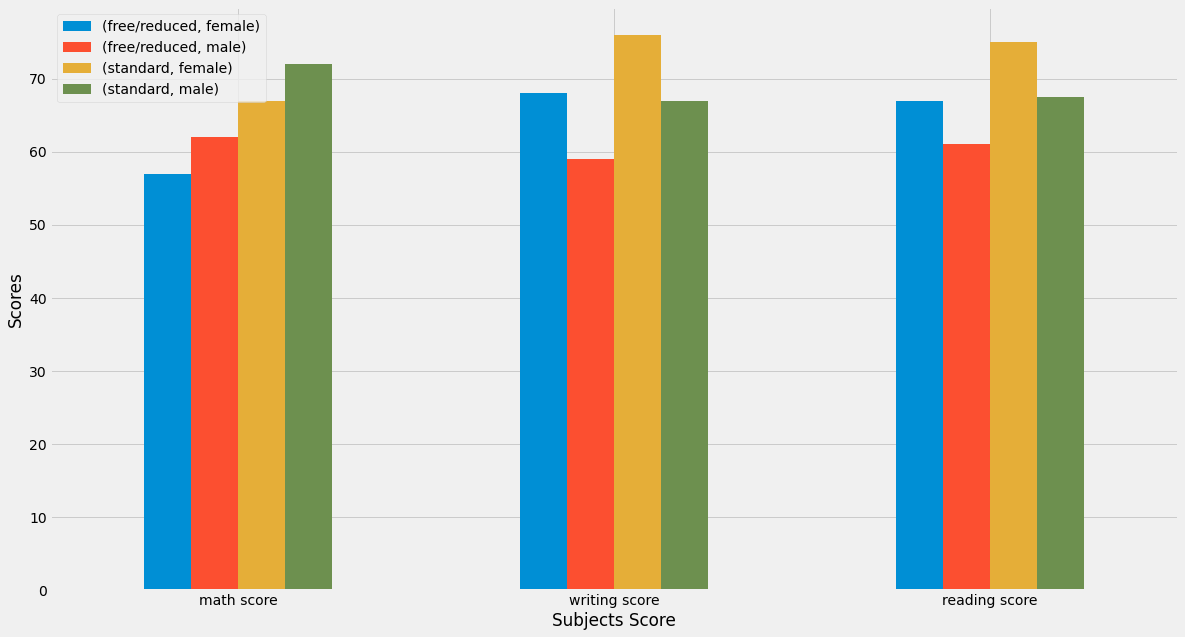

In [48]:
per.T.plot(kind="bar",figsize=(18,10));
plt.xlabel("Subjects Score");
plt.ylabel("Scores");
plt.legend(loc="upper left")
plt.xticks(rotation=0);

Lets check the Effect of Test Preparation Course on Scores

In [51]:
test_prep=df[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

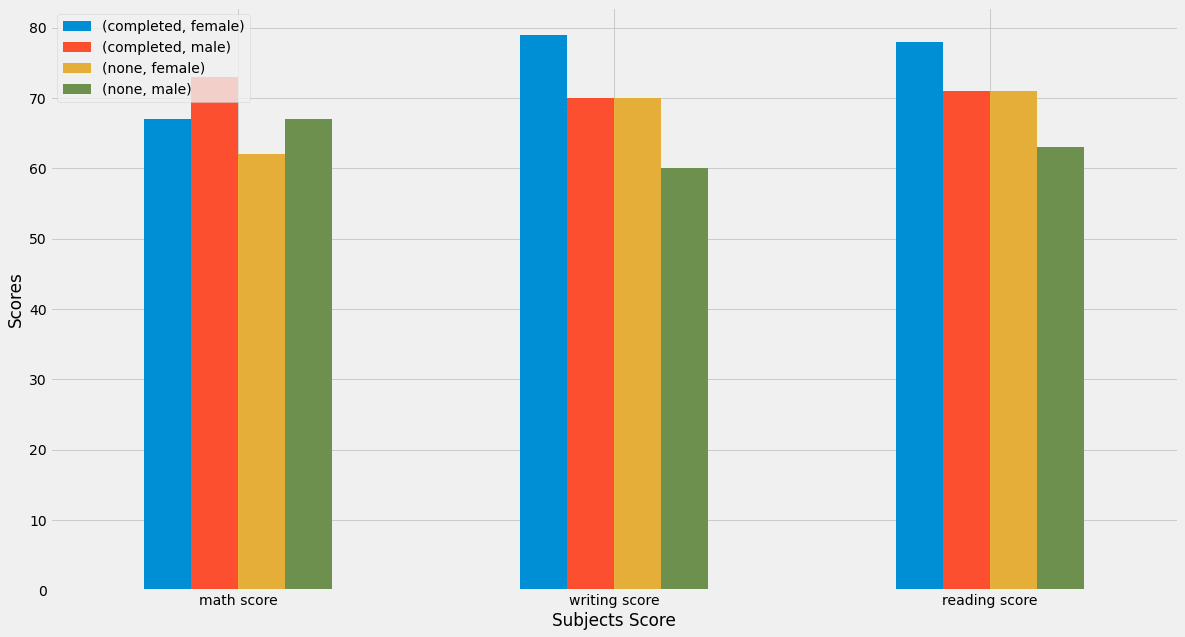

In [53]:
test_prep.T.plot(kind="bar",figsize=(18,10));
plt.xlabel("Subjects Score");
plt.ylabel("Scores");
plt.legend(loc="upper left")
plt.xticks(rotation=0);

### Data Visualizations

In [54]:
import seaborn as sns
# Visualizing the number of male and female in the data set

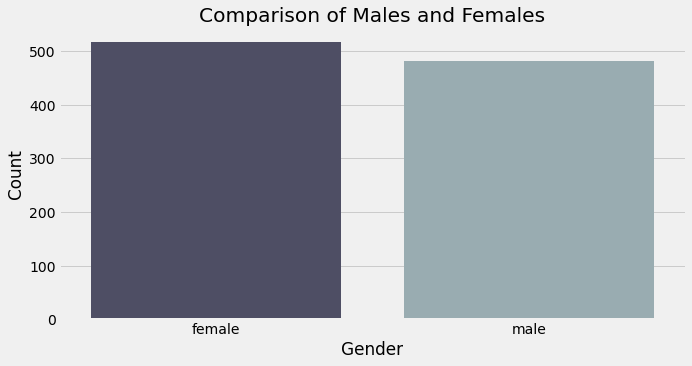

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(df['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count');


Visualizing the different groups in the data set

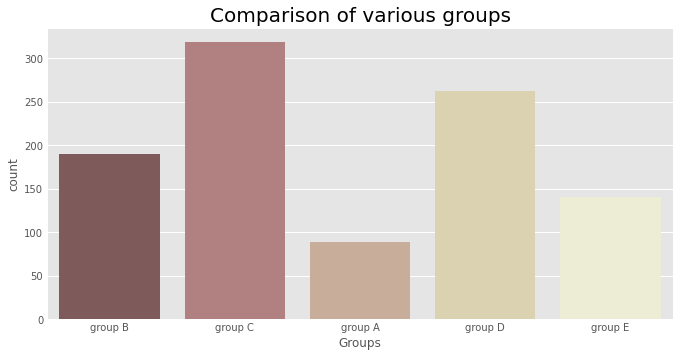

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.countplot(df['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count');
 

In [63]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [104]:
t_cours=df.groupby('test preparation course')['gender'].value_counts()
t_cours

test preparation course  gender
completed                female    184
                         male      174
none                     female    334
                         male      308
Name: gender, dtype: int64

Visualizing the different parental education levels

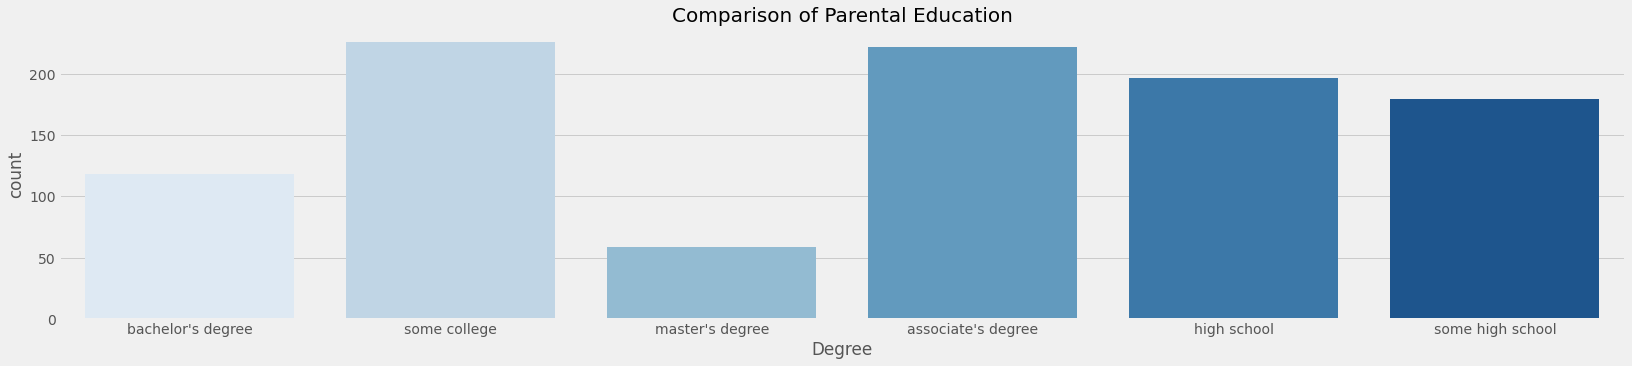

In [105]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25, 5))

sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count');

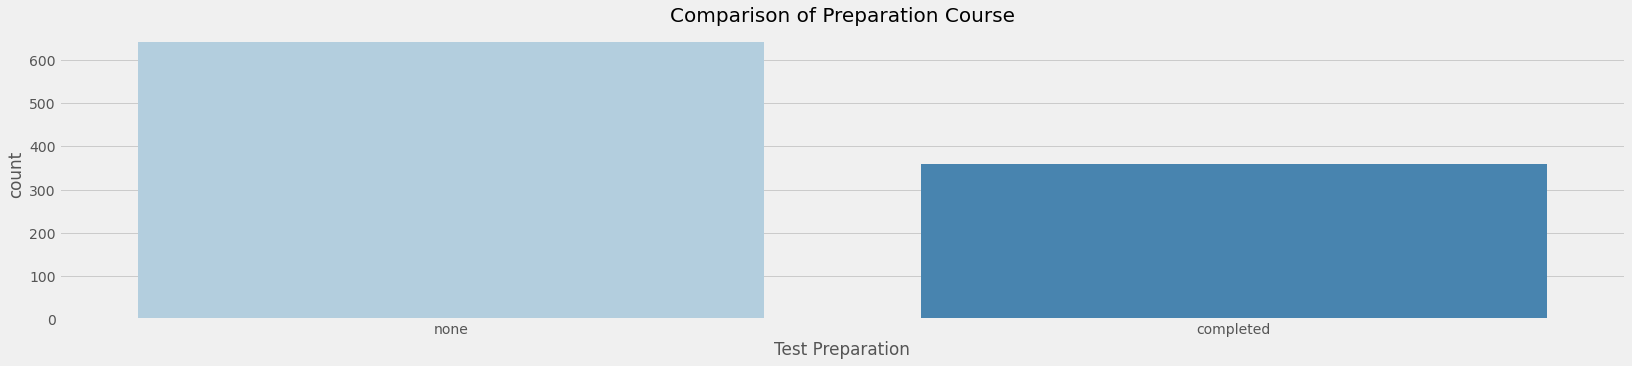

In [106]:
plt.figure(figsize=(25, 5))

sns.countplot(df['test preparation course'], palette = 'Blues')
plt.title('Comparison of Preparation Course', fontweight = 30, fontsize = 20)
plt.xlabel('Test Preparation')
plt.ylabel('count');

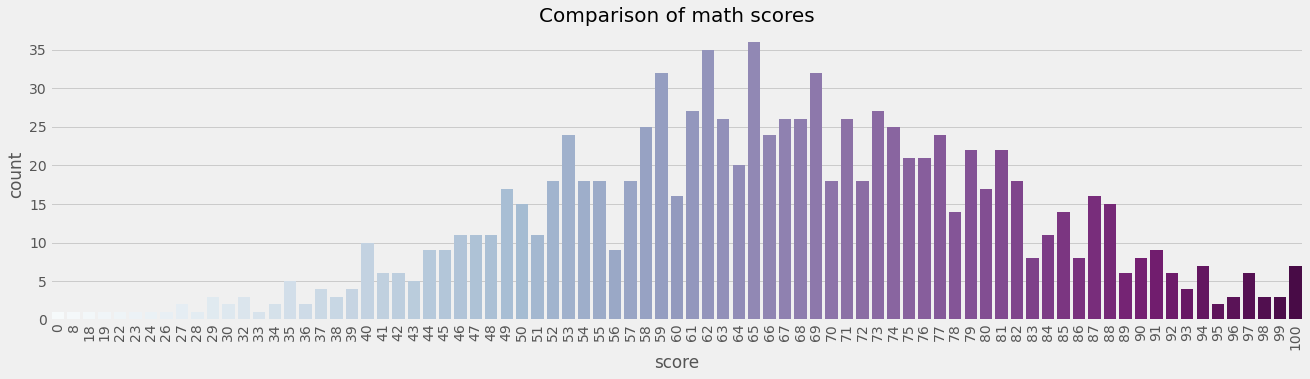

In [112]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20,5))
sns.countplot(df['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90);

### Computing the total score for each student

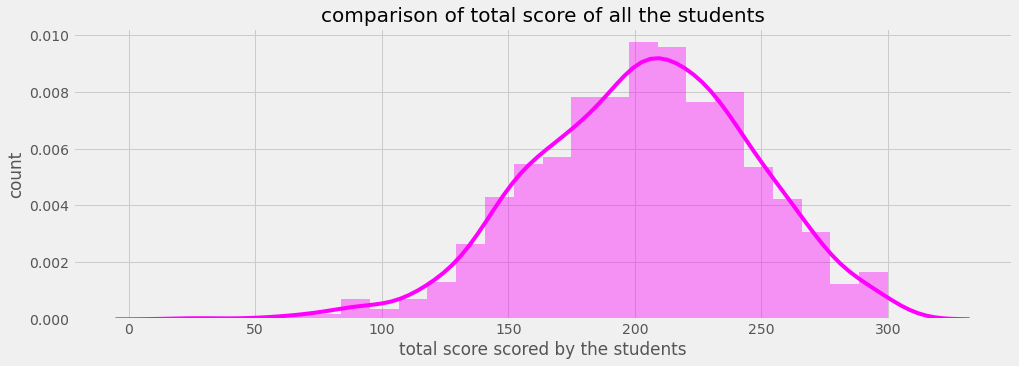

In [117]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

sns.distplot(df['total_score'], color = 'magenta')
plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count');

### Computing percentage for each of the students

In [119]:
from math import * 
import warnings
warnings.filterwarnings('ignore')

df['percentage'] = df['total_score']/3

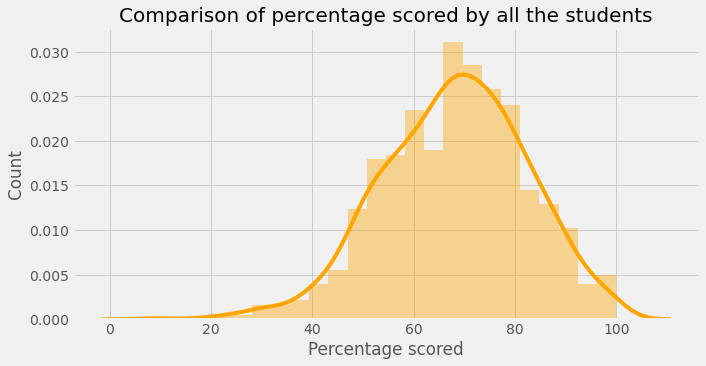

In [123]:
for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(df['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count');

Assigning grades to the grades according to the following criteria :
 * 0  - 40 marks : grade E
 * 41 - 60 marks : grade D
 * 60 - 70 marks : grade C
 * 70 - 80 marks : grade B
 * 80 - 90 marks : grade A
 * 90 - 100 marks : grade O

In [140]:
def getgrade(percentage):
 
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

In [141]:
df['grades'] = df.apply(lambda x: getgrade(x['percentage']), axis = 1 )
df['grades'].value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

In [142]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0,B
1,female,group C,some college,standard,completed,69,90,88,247,83.0,A
2,female,group B,master's degree,standard,none,90,95,93,278,93.0,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,50.0,D
4,male,group C,some college,standard,none,76,78,75,229,77.0,B


### Label Encoding

In [146]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['test preparation course']=enc.fit_transform(df['test preparation course'])
df['lunch']=enc.fit_transform(df['lunch'])

In [148]:
# label encoding for race/ethnicity
# we have to map values to each of the categories
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)


In [149]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades
0,female,2,bachelor's degree,1,1,72,72,74,218,73.0,B
1,female,3,some college,1,0,69,90,88,247,83.0,A
2,female,2,master's degree,1,1,90,95,93,278,93.0,O
3,male,1,associate's degree,0,1,47,57,44,148,50.0,D
4,male,3,some college,1,1,76,78,75,229,77.0,B


In [153]:
# label encoding for parental level of education
df['parental level of education'] = enc.fit_transform(df['parental level of education'])

#label encoding for gender
df['gender'] = enc.fit_transform(df['gender'])

 


In [156]:
df['grades'] = enc.fit_transform(df['grades'])


In [157]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades
0,0,2,1,1,1,72,72,74,218,73.0,1
1,0,3,4,1,0,69,90,88,247,83.0,0
2,0,2,3,1,1,90,95,93,278,93.0,5
3,1,1,0,0,1,47,57,44,148,50.0,3
4,1,3,4,1,1,76,78,75,229,77.0,1


### Data Preparation

Splitting the dependent and independent variables

In [164]:
df.iloc[:,:10]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage
0,0,2,1,1,1,72,72,74,218,73.0
1,0,3,4,1,0,69,90,88,247,83.0
2,0,2,3,1,1,90,95,93,278,93.0
3,1,1,0,0,1,47,57,44,148,50.0
4,1,3,4,1,1,76,78,75,229,77.0
...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,282,94.0
996,1,3,2,0,1,62,55,55,172,58.0
997,0,3,2,0,0,59,71,65,195,65.0
998,0,4,4,1,0,68,78,77,223,75.0


In [165]:
df.iloc[:,10]

0      1
1      0
2      5
3      3
4      1
      ..
995    5
996    3
997    2
998    1
999    0
Name: grades, Length: 1000, dtype: int32